使用设备: cpu
特征数量: 8
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


轮次 [1/50] 训练:   0%|          | 0/258 [00:00<?, ?it/s]

轮次 [1/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 482.21it/s, 损失=0.3603]


轮次 1/50, 训练损失: 1.3302, 验证损失: 0.5361

轮次 [5/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 385.23it/s, 损失=0.2408]


轮次 5/50, 训练损失: 0.3729, 验证损失: 0.3783

轮次 [10/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 535.97it/s, 损失=0.2044]


轮次 10/50, 训练损失: 0.3240, 验证损失: 0.3326

轮次 [15/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 539.38it/s, 损失=0.2219]


轮次 15/50, 训练损失: 0.3049, 验证损失: 0.3119

轮次 [20/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 517.31it/s, 损失=0.2005]


轮次 20/50, 训练损失: 0.2886, 验证损失: 0.3102

轮次 [25/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 625.54it/s, 损失=0.2311]


轮次 25/50, 训练损失: 0.2841, 验证损失: 0.2946

轮次 [30/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 443.91it/s, 损失=0.2020]


轮次 30/50, 训练损失: 0.2767, 验证损失: 0.2927

轮次 [35/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 438.37it/s, 损失=0.2277]


轮次 35/50, 训练损失: 0.2696, 验证损失: 0.2814

轮次 [40/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 506.20it/s, 损失=0.2402]


轮次 40/50, 训练损失: 0.2657, 验证损失: 0.2830

轮次 [45/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 422.58it/s, 损失=0.2373]


轮次 45/50, 训练损失: 0.2622, 验证损失: 0.2804

轮次 [50/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 347.85it/s, 损失=0.2239]


轮次 50/50, 训练损失: 0.2582, 验证损失: 0.2832

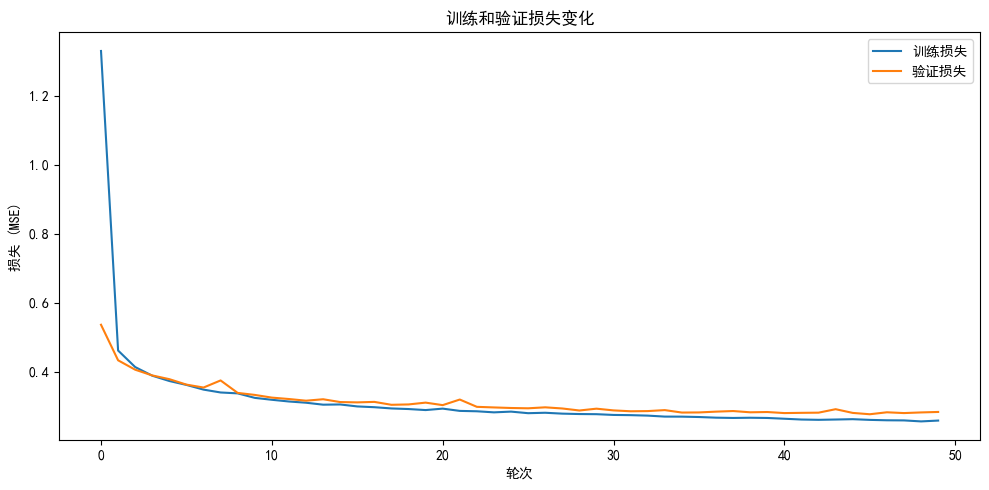

测试集均方误差 (MSE): 0.2832
测试集均方根误差 (RMSE): 0.5321
测试集平均绝对误差 (MAE): 0.3594
测试集R²分数: 0.7836
预测值在真实值10%范围内的准确率: 38.23%
预测值在真实值20%范围内的准确率: 64.95%


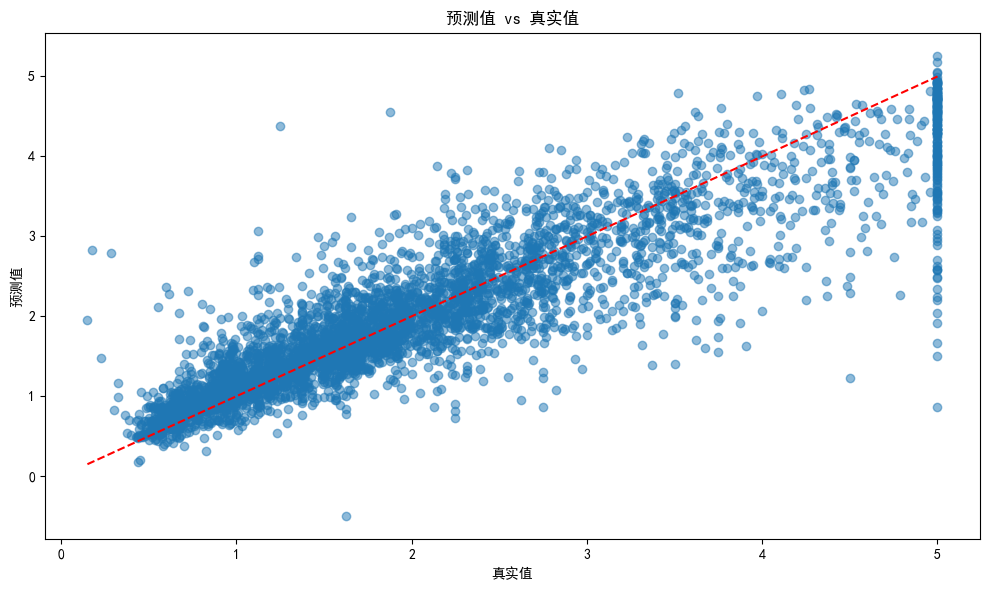

预测值在真实值10%范围内的准确率: 38.23%
模型已保存为 'california_housing_model.pth'


In [ ]:
# 加载加利福尼亚房价数据集并实现回归模型

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# 1. 数据加载和预处理
def load_california_housing_data(test_size=0.2, random_state=42):
    """
    加载加利福尼亚房价数据集并进行预处理
    
    参数:
        test_size: 测试集比例
        random_state: 随机种子
    
    返回:
        训练集和测试集的数据加载器
    """
    # 加载数据集
    housing = fetch_california_housing()
    X, y = housing.data, housing.target
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # 标准化特征
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # 转换为PyTorch张量
    X_train = torch.FloatTensor(X_train)
    y_train = torch.FloatTensor(y_train).reshape(-1, 1)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.FloatTensor(y_test).reshape(-1, 1)
    
    # 创建数据集和数据加载器
    class HousingDataset(Dataset):
        def __init__(self, X, y):
            self.X = X
            self.y = y
            
        def __len__(self):
            return len(self.X)
        
        def __getitem__(self, idx):
            return self.X[idx], self.y[idx]
    
    train_dataset = HousingDataset(X_train, y_train)#训练数据集 
    test_dataset = HousingDataset(X_test, y_test)#测试数据集
    
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)#训练数据加载器
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)#测试数据加载器
    
    return train_loader, test_loader, housing.feature_names#返回训练数据加载器、测试数据加载器和特征名称

# 2. 模型定义
class HousingRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(HousingRegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# 3. 训练模型
def train_regression_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=100):
    """
    训练回归模型
    
    参数:
        model: 模型
        train_loader: 训练数据加载器
        test_loader: 测试数据加载器
        criterion: 损失函数
        optimizer: 优化器
        device: 设备(CPU/GPU)
        num_epochs: 训练轮次
    
    返回:
        训练好的模型和训练历史
    """
    model.to(device)
    history = {
        'train_loss': [],
        'val_loss': []
    }
    
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        train_loss = 0.0
        train_pbar = tqdm(train_loader, desc=f'轮次 [{epoch+1}/{num_epochs}] 训练')
        
        for inputs, targets in train_pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # 前向传播
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_pbar.set_postfix(损失=f"{loss.item():.4f}")
        
        avg_train_loss = train_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_pbar = tqdm(test_loader, desc=f'轮次 [{epoch+1}/{num_epochs}] 验证')
        
        with torch.no_grad():
            for inputs, targets in val_pbar:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                val_pbar.set_postfix(损失=f"{loss.item():.4f}")
        
        avg_val_loss = val_loss / len(test_loader)
        history['val_loss'].append(avg_val_loss)
        
        # 每5个epoch输出一次，覆盖前一次输出
        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"\r轮次 {epoch+1}/{num_epochs}, 训练损失: {avg_train_loss:.4f}, 验证损失: {avg_val_loss:.4f}", end="")
        # 设置中文样式，解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
    # 绘制训练历史
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='训练损失')
    plt.plot(history['val_loss'], label='验证损失')
    plt.xlabel('轮次')
    plt.ylabel('损失 (MSE)')
    plt.title('训练和验证损失变化')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return model, history

# 4. 评估模型
def evaluate_regression_model(model, test_loader, device):
    """
    评估回归模型
    
    参数:
        model: 模型
        test_loader: 测试数据加载器
        device: 设备(CPU/GPU)
    
    返回:
        均方误差(MSE)、均方根误差(RMSE)和R²分数
    """
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            
            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    # 转换为numpy数组以便计算
    all_preds = np.array(all_preds)
    all_targets = np.array(all_targets)
    
    # 计算评估指标
    mse = total_loss / len(test_loader)
    rmse = np.sqrt(mse)
    
    # 计算R²分数（决定系数）- 衡量模型解释目标变量方差的比例
    # R² = 1 - (残差平方和 / 总平方和)
    mean_target = np.mean(all_targets)
    ss_total = np.sum((all_targets - mean_target) ** 2)
    ss_residual = np.sum((all_targets - all_preds) ** 2)
    r2_score = 1 - (ss_residual / ss_total)
    
    # 计算平均绝对误差(MAE)
    mae = np.mean(np.abs(all_targets - all_preds))
    
    # 计算相对误差 - 预测值与真实值的相对误差在一定范围内的比例
    # 这里我们定义相对误差在10%以内的为"准确"
    relative_errors = np.abs(all_preds - all_targets) / (all_targets + 1e-10)  # 避免除零
    accuracy_10 = np.mean(relative_errors <= 0.1) * 100  # 10%以内的准确率
    accuracy_20 = np.mean(relative_errors <= 0.2) * 100  # 20%以内的准确率
    
    print(f"测试集均方误差 (MSE): {mse:.4f}")
    print(f"测试集均方根误差 (RMSE): {rmse:.4f}")
    print(f"测试集平均绝对误差 (MAE): {mae:.4f}")
    print(f"测试集R²分数: {r2_score:.4f}")
    print(f"预测值在真实值10%范围内的准确率: {accuracy_10:.2f}%")
    print(f"预测值在真实值20%范围内的准确率: {accuracy_20:.2f}%")
    # 设置中文样式，解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
    # 绘制预测值与真实值的散点图
    plt.figure(figsize=(10, 6))
    plt.scatter(all_targets, all_preds, alpha=0.5)
    plt.plot([min(all_targets), max(all_targets)], [min(all_targets), max(all_targets)], 'r--')
    plt.xlabel('真实值')
    plt.ylabel('预测值')
    plt.title('预测值 vs 真实值')
    plt.tight_layout()
    plt.show()
    
    return mse, rmse, r2_score, accuracy_10

# 5. 主函数：执行完整的训练和评估流程
def main():
    # 设置设备
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"使用设备: {device}")
    
    # 加载数据
    train_loader, test_loader, feature_names = load_california_housing_data()
    print(f"特征数量: {len(feature_names)}")
    print(f"特征名称: {feature_names}")
    
    # 创建模型
    input_size = len(feature_names)
    model = HousingRegressionModel(input_size)
    
    # 定义损失函数和优化器
    criterion = nn.MSELoss()#均方误差
    optimizer = optim.Adam(model.parameters(), lr=0.001)#Adam优化器
    
    # 训练模型
    model, history = train_regression_model(
        model, train_loader, test_loader, criterion, optimizer, device, num_epochs=50
    )
    
    # 评估模型
    mse, rmse, r2_score, accuracy_10 = evaluate_regression_model(model, test_loader, device)
    print(f"预测值在真实值10%范围内的准确率: {accuracy_10:.2f}%")
    
    # 保存模型
    torch.save(model.state_dict(), 'california_housing_model.pth')
    print("模型已保存为 'california_housing_model.pth'")

# 执行主函数
if __name__ == "__main__":
    main()
else:
    # 在Jupyter Notebook中直接执行
    main()
